In [18]:
# Dependencies and setup
import pandas as pd
from pathlib import Path
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [19]:
# File to load
to_load = Path("cancer_patient_datasets.csv")
# Create the dataframe
nn_df = pd.read_csv(to_load)

In [20]:
# drop unnecessary columns index and Patient Id
nn_df = nn_df.drop(columns=['index', 'Patient Id'])

In [21]:
# convert low, medium, high to numeric
nn_df.Level = nn_df.Level.replace("Low", 0)
nn_df.Level = nn_df.Level.replace("Medium", 1)
nn_df.Level = nn_df.Level.replace("High", 2)

nn_df.Level = nn_df.Level.astype("int64")
# create target and features array
X = nn_df.drop("Level", axis = 1)
y = pd.get_dummies(nn_df["Level"])

In [22]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  30
hidden_nodes_layer2 = 20

nn1 = tf.keras.models.Sequential()

In [ ]:
# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check the structure of the model
nn1.summary()

In [ ]:
# Compile the model
nn1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

In [ ]:
# Train the model
fit_model = nn1.fit(X_train_scaled,y_train,epochs=100)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
# Define the file path for saving the model
filepath = "LungCancer.h5"

# Save the model to HDF5 format
nn1.save(filepath)

In [7]:
def calculate_accuracy(y_true, y_pred):
    # find the index with the highest probability
    y_true = tf.argmax(y_true, axis=1)
    y_pred = tf.argmax(y_pred, axis=1)
    
    # Compare predicted labels to true labels and calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), dtype=tf.float32))
    
    return accuracy.numpy()


In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  30
hidden_nodes_layer2 = 20

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Compile the model
nn1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Initialize lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

epochs = 50

for e in range(epochs):
    # Fit the model on training data
    nn1.fit(X_train,y_train,epochs=1)
    
    # Predict on training data
    y_pred_train = nn1.predict(X_train)
    
    # Predict on test data
    y_pred_test = nn1.predict(X_test)
    
    # Calculate training accuracy
    train_accuracy = calculate_accuracy(y_train, y_pred_train)
    
    # Calculate test accuracy
    test_accuracy = calculate_accuracy(y_test, y_pred_test)
    
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)




/Users/miha_mac/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.3424 - loss: 2.4405
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.6521 - loss: 0.9084
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.6347 - loss: 0.7415
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.7330 - loss: 0.6169
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.7842 - loss: 0.6104
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8400 - loss: 0.5202
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.8635 - loss: 0.

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - 5ms/step - accuracy: 0.4680 - loss: 1.0501
Loss: 1.050062656402588, Accuracy: 0.46799999475479126


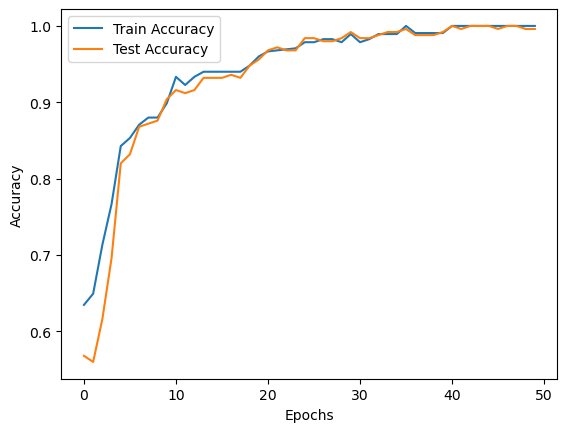

In [17]:
# Plotting
plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()